In [1]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bikesharing = pd.read_csv("C:\\Users\\vaish\\Downloads\\day.csv")

In [3]:
df_bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_bikesharing.shape

(730, 16)

In [5]:
df_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
print("Total number of missing values")
print(30 * "-")
print(df_bikesharing.isna().sum())
print(30 * "-")
print("Total missing values are:", df_bikesharing.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
------------------------------
Total missing values are: 0
------------------------------


In [7]:
# Ther are no missing values and the data is good to use

In [9]:
# list the numerical,categorical columns
list_catg_cols = ["season","yr","mnth","dteday","holiday","weekday","workingday","weathersit"]
list_cont_cols = ["temp","atemp","hum","windspeed","casual","registered","cnt"]

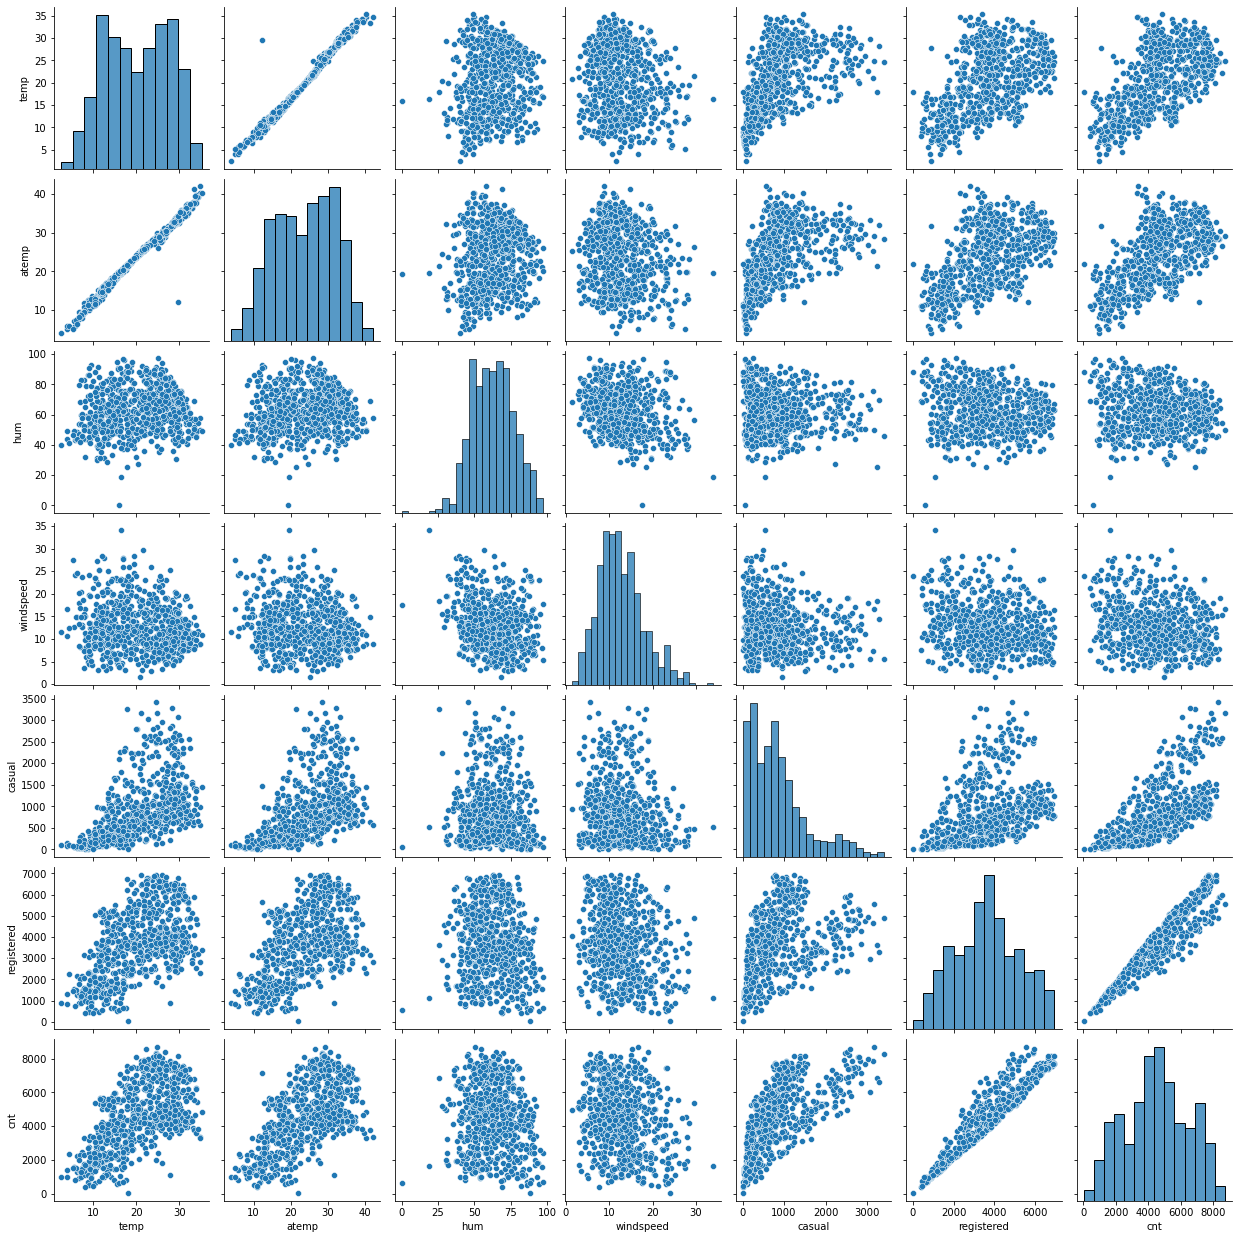

In [10]:
#plotting the continous columns to visualize the corelation 
sns.pairplot(df_bikesharing[list_cont_cols])
plt.show()

In [11]:
# we can see the variables temp,atemp,casual are postively correlated with the target variable cnt

In [12]:
#giving names for categorical values for better readability
dict_season = { 1:"spring", 2:"summer", 3:"fall", 4:"winter"}
dict_weathersit = { 1:"clear",2:"Mist",3:"Lightsnow_Rain",4:"Heavysnow_Rain"}
dict_day = {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}
dict_mnth = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

In [13]:
#extracting only date field to understand the pattern of bike demand on particular days of the month
df_bikesharing["date"] = df_bikesharing["dteday"].apply(lambda x: x[0:2])

In [14]:
df_bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [15]:
#replacing the values with names
df_bikesharing["season"].replace(dict_season, inplace = True)

In [16]:
df_bikesharing["weathersit"].replace(dict_weathersit,inplace = True)

In [17]:
df_bikesharing["weekday"] = df_bikesharing["weekday"].replace(dict_day)

In [18]:
df_bikesharing["mnth"] = df_bikesharing["mnth"].replace(dict_mnth)

In [19]:
df_bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05


In [20]:
#visualize the categorical variables relation with the target variable

<AxesSubplot:xlabel='date', ylabel='cnt'>

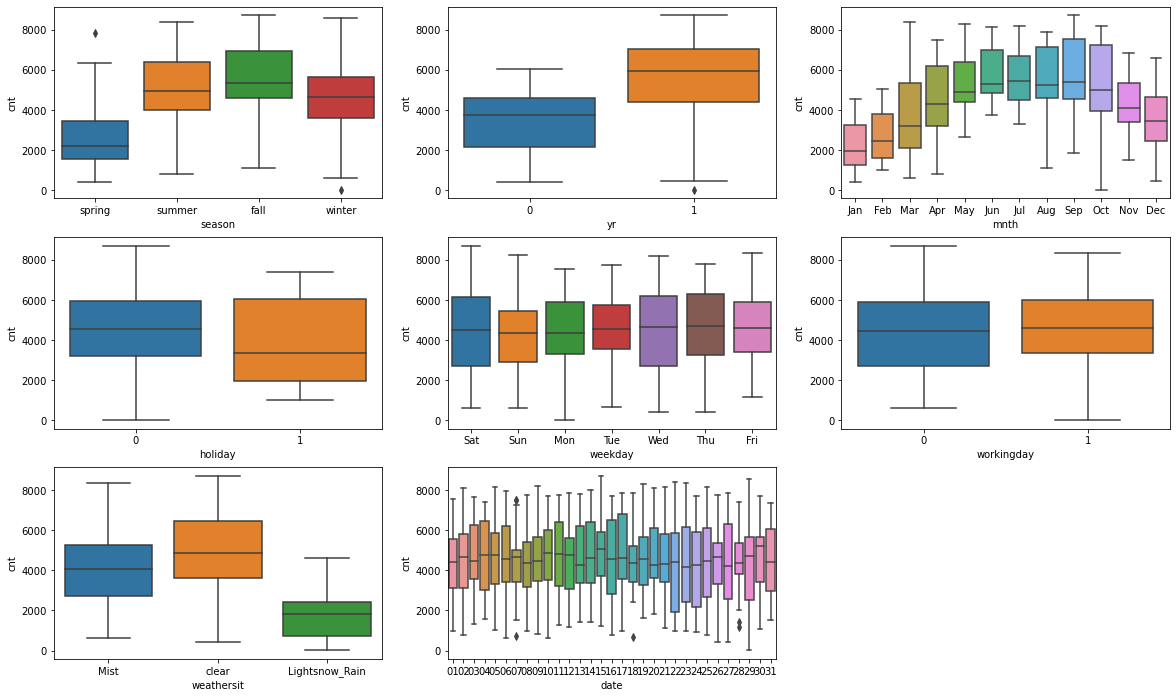

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x="season", y ="cnt" , data = df_bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x="yr", y ="cnt" , data = df_bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x="mnth", y ="cnt" , data = df_bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x="holiday", y ="cnt" , data = df_bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x="weekday", y ="cnt" , data = df_bikesharing)
plt.subplot(3,3,6)
sns.boxplot(x="workingday", y ="cnt" , data = df_bikesharing)
plt.subplot(3,3,7)
sns.boxplot(x="weathersit", y ="cnt" , data = df_bikesharing)
plt.subplot(3,3,8)
sns.boxplot(x="date", y ="cnt" , data = df_bikesharing)

In [22]:
#The demand for bikes is usually higher during Summer and Fall season than the Spring and Winter seasons
#The demand for bikes is higher in the year 2019
#The demand for bikes is higher when the weather situation is clear 
#The demand for bikes is less during winter – from the month of December to February


In [ ]:
# the demand on days of the week are implied within holidays and workingdays and months are implied in the seaons values. 
#So we are not adding dummies for these fields.

In [23]:
#add dummy variables for weathersit,season
bike_dummies = pd.get_dummies(df_bikesharing[["season","weathersit"]],drop_first = True)

In [24]:
df_bikesharing = pd.concat([df_bikesharing,bike_dummies],axis = 1)

In [25]:
df_bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,date,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_clear
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,...,10.749882,331,654,985,01,1,0,0,1,0
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,...,16.652113,131,670,801,02,1,0,0,1,0
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,...,16.636703,120,1229,1349,03,1,0,0,0,1
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,...,10.739832,108,1454,1562,04,1,0,0,0,1
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,...,12.522300,82,1518,1600,05,1,0,0,0,1


In [26]:
df_bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,date,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_clear
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,...,10.749882,331,654,985,01,1,0,0,1,0
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,...,16.652113,131,670,801,02,1,0,0,1,0
2,3,03-01-2018,spring,0,Jan,0,Mon,1,clear,8.050924,...,16.636703,120,1229,1349,03,1,0,0,0,1
3,4,04-01-2018,spring,0,Jan,0,Tue,1,clear,8.200000,...,10.739832,108,1454,1562,04,1,0,0,0,1
4,5,05-01-2018,spring,0,Jan,0,Wed,1,clear,9.305237,...,12.522300,82,1518,1600,05,1,0,0,0,1


In [27]:
# we can drop off season,weathersit,date columns

df_bikesharing = df_bikesharing.drop(columns = ["season","weathersit","date","instant","dteday","weekday","mnth","casual","registered"])               

In [28]:
df_bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_clear
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
np.random.seed(0)
df_train, df_test = train_test_split(df_bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_clear
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0


In [35]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_clear
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


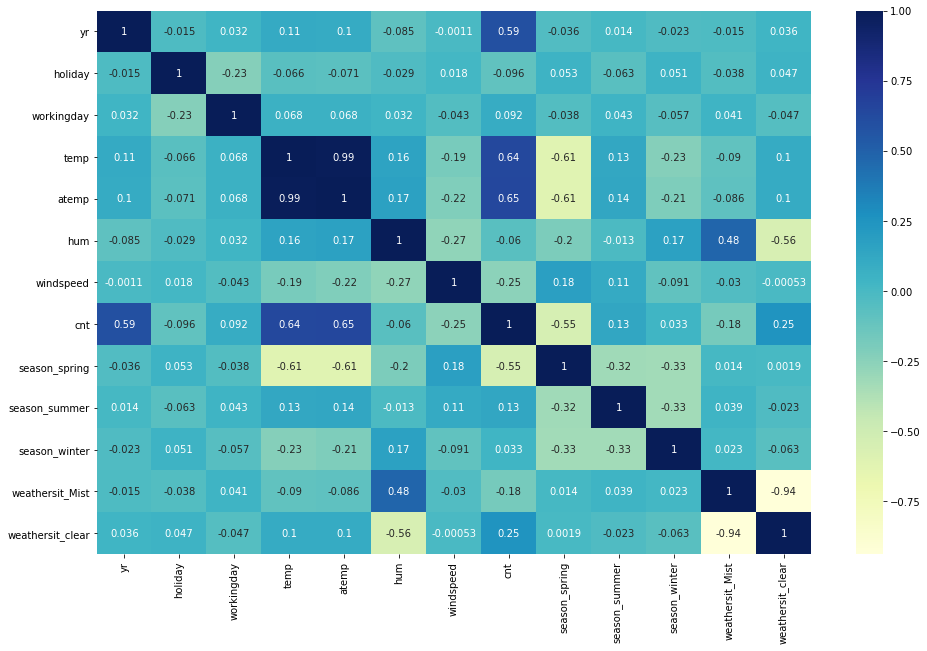

In [36]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const               0.038068
yr                  0.230318
holiday            -0.074601
workingday          0.017504
temp                0.464536
atemp               0.032110
hum                -0.138668
windspeed          -0.179510
season_spring      -0.074947
season_summer       0.041347
season_winter       0.088469
weathersit_Mist     0.187793
weathersit_clear    0.242222
dtype: float64

In [39]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.86e-181
Time:                        23:26:06   Log-Likelihood:                 488.03
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0381      0.049  

In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,377.90
4,atemp,364.59
5,hum,23.98
11,weathersit_clear,14.18
10,weathersit_Mist,8.73
7,season_spring,5.10
6,windspeed,4.86
9,season_winter,3.75
2,workingday,3.22
8,season_summer,2.63


In [43]:
# Dropping highly correlated variables and insignificant variables
#atemp has teh hight p value , so dropping it first
X = X_train.drop('atemp', 1,)

In [44]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train,X_train_lm).fit()

In [45]:
lr_2.params

const               0.037464
yr                  0.230287
holiday            -0.074835
workingday          0.017496
temp                0.494988
hum                -0.138240
windspeed          -0.180687
season_spring      -0.074400
season_summer       0.041949
season_winter       0.089186
weathersit_Mist     0.188142
weathersit_clear    0.242643
dtype: float64

In [46]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.26e-182
Time:                        23:27:39   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0375      0.049  

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,23.97
3,temp,20.26
10,weathersit_clear,14.15
9,weathersit_Mist,8.72
6,season_spring,5.04
5,windspeed,4.60
8,season_winter,3.64
2,workingday,3.22
7,season_summer,2.54
0,yr,2.09


In [ ]:
# there are multicollinear variables and needs to be eliminated

In [ ]:
#dropping working day that has highest p-value

In [48]:
X1 = X.drop('workingday', 1,)

In [49]:
X_train_lm = sm.add_constant(X1)
lr_3 = sm.OLS(y_train,X_train_lm).fit()

In [50]:
lr_3.params

const               0.051545
yr                  0.230700
holiday            -0.086508
temp                0.496094
hum                -0.138999
windspeed          -0.182704
season_spring      -0.074635
season_summer       0.042143
season_winter       0.088326
weathersit_Mist     0.187222
weathersit_clear    0.240933
dtype: float64

In [51]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          4.78e-183
Time:                        23:28:03   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0515      0.049  

In [52]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.69
2,temp,20.14
9,weathersit_clear,14.01
8,weathersit_Mist,8.65
5,season_spring,5.02
4,windspeed,4.60
7,season_winter,3.63
6,season_summer,2.53
0,yr,2.09
1,holiday,1.04


In [53]:
#dropping variables with high VIF
X2=X1.drop("hum",1)

In [54]:
X_train_lm = sm.add_constant(X2)
lr_4 = sm.OLS(y_train,X_train_lm).fit()

In [55]:
lr_4.params

const              -0.057115
yr                  0.234019
holiday            -0.087727
temp                0.466651
windspeed          -0.154649
season_spring      -0.082379
season_summer       0.037133
season_winter       0.075960
weathersit_Mist     0.203104
weathersit_clear    0.279446
dtype: float64

In [56]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.42e-181
Time:                        23:28:36   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0571      0.038  

In [57]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,weathersit_clear,13.93
2,temp,11.53
7,weathersit_Mist,7.74
3,windspeed,4.58
4,season_spring,3.75
6,season_winter,2.41
5,season_summer,2.21
0,yr,2.07
1,holiday,1.04


In [ ]:
#drop weathersit_clear column

In [59]:
X3 = X2.drop("weathersit_clear",1)

In [60]:
X_train_lm = sm.add_constant(X3)
lr_5 = sm.OLS(y_train,X_train_lm).fit()

In [61]:
lr_5.params

const              0.206665
yr                 0.239496
holiday           -0.075312
temp               0.479251
windspeed         -0.182829
season_spring     -0.072034
season_summer      0.043135
season_winter      0.068896
weathersit_Mist   -0.063545
dtype: float64

In [62]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     222.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.27e-159
Time:                        23:30:14   Log-Likelihood:                 425.27
No. Observations:                 510   AIC:                            -832.5
Df Residuals:                     501   BIC:                            -794.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2067      0.033     

In [63]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.53
2,temp,3.56
0,yr,2.06
4,season_spring,1.96
5,season_summer,1.79
6,season_winter,1.59
7,weathersit_Mist,1.50
1,holiday,1.04


In [ ]:
# now we have the correct variables for the model. we can start predicting

In [64]:
y_train_cnt = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

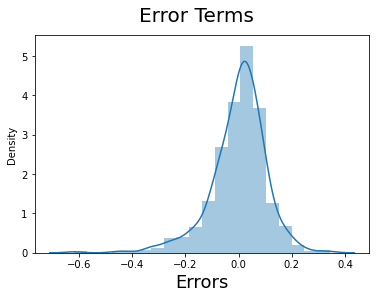

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [ ]:
#we have the error that is normally distributed and mean at 0.0. This shows this is good model

In [66]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_clear
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,1
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,1


In [67]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [68]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_clear
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.319635,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.467403,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
X_test_lm = sm.add_constant(X_test)

In [72]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_lm = X_test_lm.drop(["atemp", "hum", "workingday","weathersit_clear"], axis = 1)

In [73]:
# Making predictions using the fourth model

y_pred_lm = lr_5.predict(X_test_lm)

In [ ]:
# Model Evaluation

Text(0, 0.5, 'y_pred')

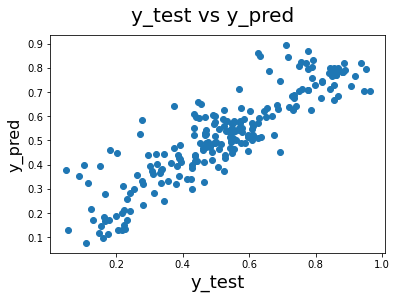

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [ ]:
# coefficients of features
const               0.2067     
yr                  0.2395     
holiday            -0.0753     
temp                0.4793     
windspeed          -0.1828     
season_spring      -0.0720     
season_summer       0.0431     
season_winter       0.0689     
weathersit_Mist    -0.0635

In [ ]:
# the equation for the target variable is
#cnt = 0.2067 + 0.2395 * yr - 0.0753 * holiday + 0.4793 * temp -0.1828 * windspeed - 0.0720 * season_spring
#        + 0.0431 * season_summer + 0.0689 * season_winter - 0.0635 * weathersit_Mist

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm)

0.7750610214343931

In [ ]:
# 77.5 percent of variance can be explained by the varaibles chosen